<a href="https://colab.research.google.com/github/Dmitze/Dmitze/blob/main/%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%A8%D0%B8%D0%B2%D0%B0%D1%87%D0%BE%D0%B2_%D0%92%D0%BB%D0%B0%D1%81%D0%BD%D1%96_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%BD%D1%8F_%D1%82%D0%B0_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Імпорт бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

## 2. Завантаження даних

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## 3. Базові статистичні характеристики

In [3]:
print("Статистика датасету:")
print(df.describe())

Статистика датасету:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


## 4. Візуалізація розподілу спостережень за класами

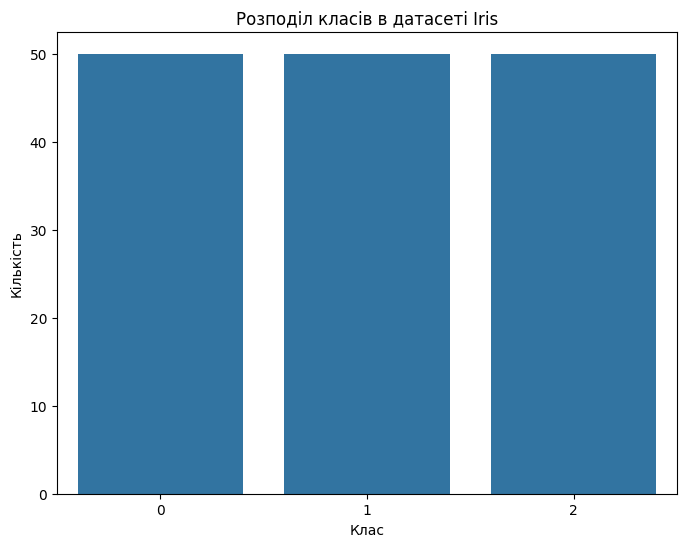

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Розподіл класів в датасеті Iris')
plt.xlabel('Клас')
plt.ylabel('Кількість')
plt.show()

## 5. Стандартизація даних

In [5]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Дані стандартизовано. Форма матриці:", X_scaled.shape)

Дані стандартизовано. Форма матриці: (150, 4)


## 6. Спектральна кластеризація

In [6]:
clustering = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')
clusters = clustering.fit_predict(X_scaled)

print("Кластеризацію виконано!")
print("Унікальні кластери:", np.unique(clusters))
print("Розподіл по кластерах:", np.bincount(clusters))

Кластеризацію виконано!
Унікальні кластери: [0 1 2]
Розподіл по кластерах: [35 49 66]


## 7. Узгодження міток кластерів з справжніми класами

Алгоритм кластеризації не знає справжніх назв класів. Для точної оцінки потрібно узгодити мітки.

In [7]:
def map_clusters_to_labels(clusters, true_labels):
    mapped_clusters = np.zeros_like(clusters)
    for cluster_id in np.unique(clusters):
        mask = (clusters == cluster_id)
        most_common_label = mode(true_labels[mask], keepdims=False)[0]
        mapped_clusters[mask] = most_common_label
    return mapped_clusters

clusters_mapped = map_clusters_to_labels(clusters, y.values)

print("Мітки кластерів узгоджено!")
print("Оригінальні кластери (перші 10):", clusters[:10])
print("Узгоджені кластери (перші 10):", clusters_mapped[:10])
print("Справжні класи (перші 10):", y.values[:10])

Мітки кластерів узгоджено!
Оригінальні кластери (перші 10): [1 1 1 1 1 1 1 1 1 1]
Узгоджені кластери (перші 10): [0 0 0 0 0 0 0 0 0 0]
Справжні класи (перші 10): [0 0 0 0 0 0 0 0 0 0]


## 8. Confusion Matrix

Confusion Matrix (після узгодження міток):
[[49  1  0]
 [ 0 47  3]
 [ 0 18 32]]

Точність кластеризації: 85.33%



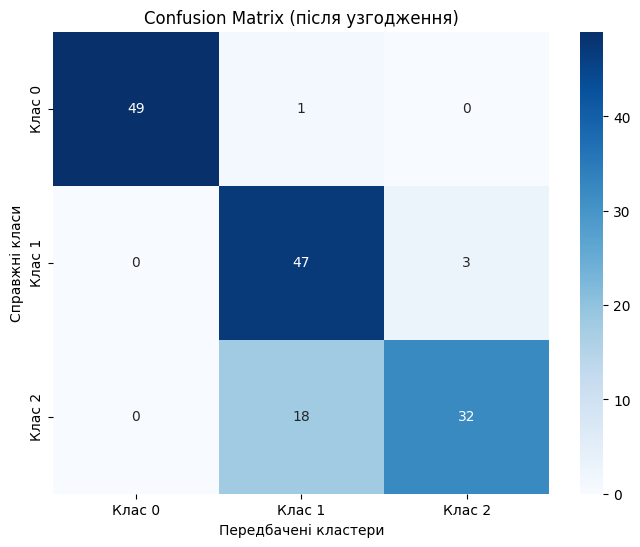

In [8]:
cm = confusion_matrix(y, clusters_mapped)
print("Confusion Matrix (після узгодження міток):")
print(cm)
print()

accuracy = np.trace(cm) / np.sum(cm)
print(f"Точність кластеризації: {accuracy:.2%}")
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Клас 0', 'Клас 1', 'Клас 2'],
            yticklabels=['Клас 0', 'Клас 1', 'Клас 2'])
plt.xlabel('Передбачені кластери')
plt.ylabel('Справжні класи')
plt.title('Confusion Matrix (після узгодження)')
plt.show()

## 9. Візуалізація результатів кластеризації

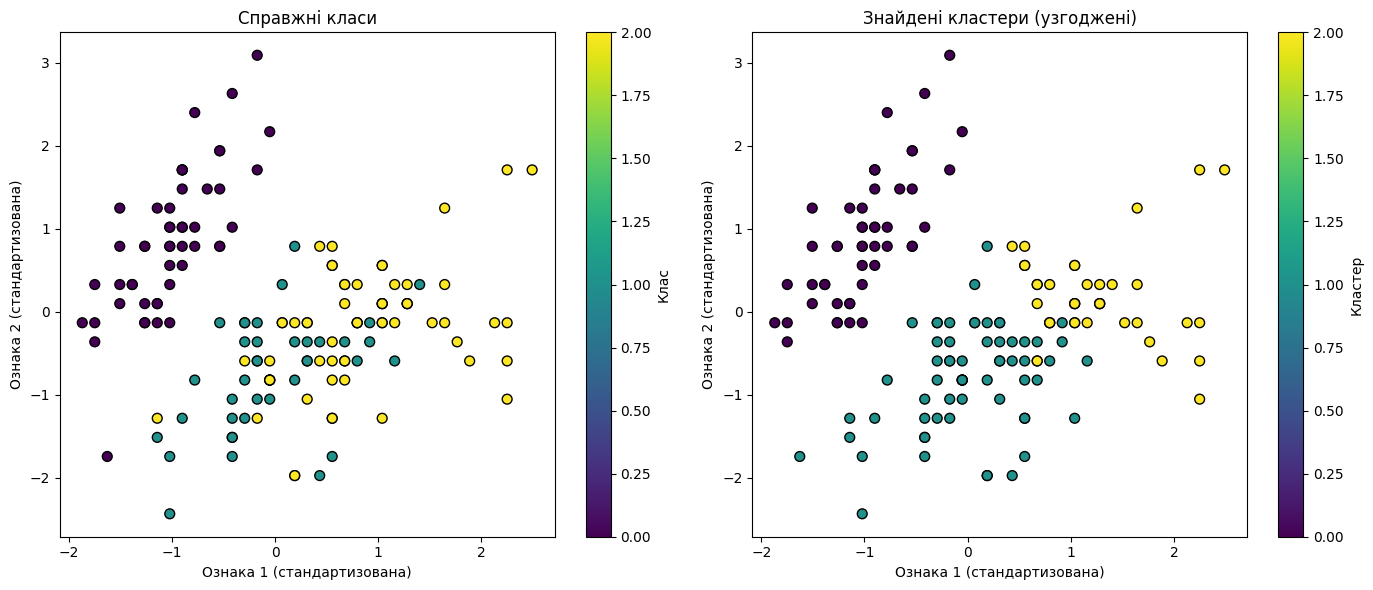

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Справжні класи')
plt.xlabel('Ознака 1 (стандартизована)')
plt.ylabel('Ознака 2 (стандартизована)')
plt.colorbar(label='Клас')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_mapped, cmap='viridis', edgecolors='k', s=50)
plt.title('Знайдені кластери (узгоджені)')
plt.xlabel('Ознака 1 (стандартизована)')
plt.ylabel('Ознака 2 (стандартизована)')
plt.colorbar(label='Кластер')

plt.tight_layout()
plt.show()

## 10. Висновки

У цій роботі було виконано спектральну кластеризацію на наборі даних Iris. Датасет містить 150 спостережень, розділених на 3 класи. Після стандартизації даних алгоритм успішно розділив їх на 3 кластери.

Важливим кроком було узгодження міток кластерів зі справжніми класами, оскільки алгоритм не знає реальних назв і нумерує їх довільно. Confusion Matrix після узгодження показує точну картину співпадінь між кластерами та справжніми класами.

Спектральна кластеризація показала високу ефективність на датасеті Iris. При порівнянні результатів кластеризації необхідно узгоджувати мітки, інакше Confusion Matrix може бути неточною.